1. 퍼셉트론

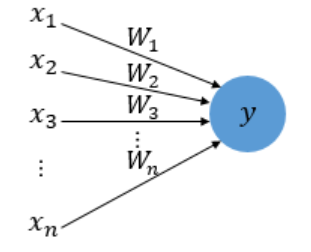

x 는 입력값을 의미하며, W는 가중치(Weight), y는 출력값입니다. 그림 안의 원은 인공 뉴런에 해당됩니다. 실제 신경 세포 뉴런에서의 신호를 전달하는 축삭돌기의 역할을 퍼셉트론에서는 가중치가 대신합니다. 각각의 인공 뉴런에서 보내진 입력값 x는 각각의 가중치 W와 함께 종착지인 인공 뉴런에 전달되고 있습니다.

각각의 입력값에는 각각의 가중치가 존재하는데, 이때 가중치의 값이 크면 클수록 해당 입력 값이 중요하다는 것을 의미합니다.

각 입력값이 가중치와 곱해져서 인공 뉴런에 보내지고, 각 입력값과 그에 해당되는 가중치의 곱의 전체 합이 임계치(threshold)를 넘으면 종착지에 있는 인공 뉴런은 출력 신호로서 1을 출력하고, 그렇지 않을 경우에는 0을 출력합니다. 이러한 함수를 계단 함수(Step function)라고 하며, 아래는 그래프는 계단 함수의 하나의 예를 보여줍니다.

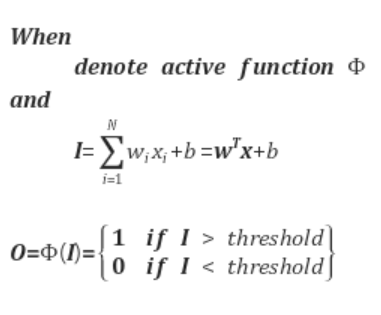

1. 임이 분포로 가중치 초기화
2. 입력 벡터를 선택하고 네트워크에 사용한다
3. 지정한 입력 벡터와 가중치 값에 대한 네트워크 y' 를 출력한다

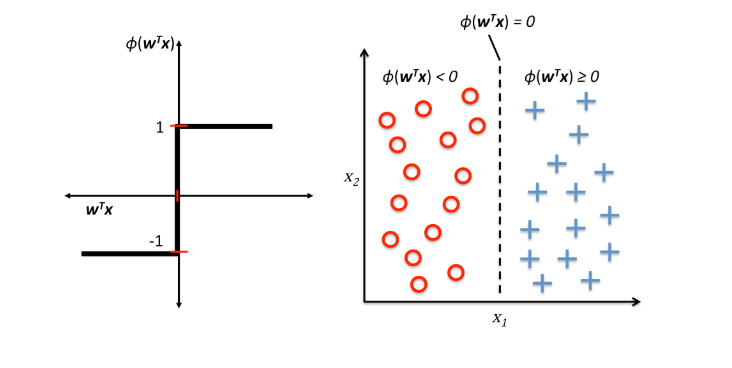

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pprint import pprint
%matplotlib inline
from sklearn import datasets
import matplotlib.pyplot as plt


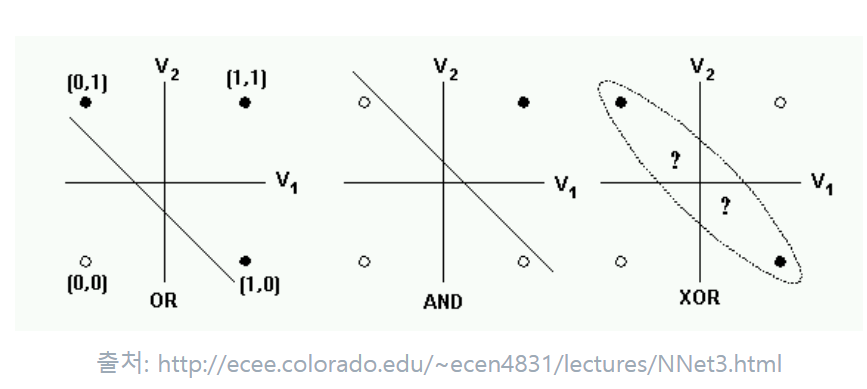

In [7]:
def AND_gate(x1, x2):
    w1=0.5
    w2=0.5
    b=-0.7
    result = x1*w1 + x2*w2 + b
    if result <= 0:
        return 0
    else:
        return 1

In [8]:
AND_gate(0, 0), AND_gate(0, 1), AND_gate(1, 0), AND_gate(1, 1)

(0, 0, 0, 1)

In [9]:
def NAND_gate(x1, x2):
    w1=-0.5
    w2=-0.5
    b=0.7
    result = x1*w1 + x2*w2 + b
    if result <= 0:
        return 0
    else:
        return 1

In [10]:
NAND_gate(0, 0), NAND_gate(0, 1), NAND_gate(1, 0), NAND_gate(1, 1)

(1, 1, 1, 0)

In [11]:
def OR_gate(x1, x2):
    w1=0.6
    w2=0.6
    b=-0.5
    result = x1*w1 + x2*w2 + b
    if result <= 0:
        return 0
    else:
        return 1

In [12]:
OR_gate(0, 0), OR_gate(0, 1), OR_gate(1, 0), OR_gate(1, 1)

(0, 1, 1, 1)

이처럼 단층 퍼셉트론은 AND 게이트, NAND 게이트, OR 게이트 또한 구현할 수 있습니다. 하지만 단층 퍼셉트론으로 구현이 불가능한 게이트가 있는데 바로 XOR 게이트입니다. XOR 게이트는 입력값 두 개가 서로 다른 값을 갖고 있을때에만 출력값이 1이 되고, 입력값 두 개가 서로 같은 값을 가지면 출력값이 0이 되는 게이트입니다. 위의 파이썬 코드에 아무리 수많은 가중치와 편향을 넣어봐도 XOR 게이트를 구현하는 것은 불가능합니다. 그 이유는 단층 퍼셉트론은 직선 하나로 두 영역을 나눌 수 있는 문제에 대해서만 구현이 가능하기 때문입니다.

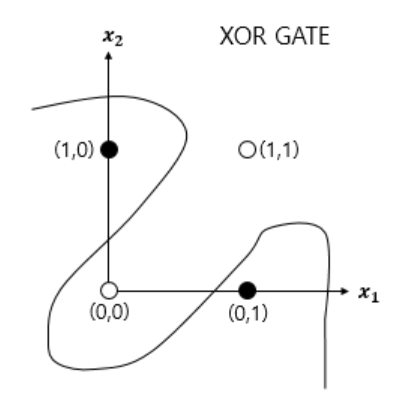

XOR 게이트는 기존의 AND, NAND, OR 게이트를 조합하면 만들 수 있습니다. 퍼셉트론 관점에서 말하면, 층을 더 쌓으면 만들 수 있습니다. 다층 퍼셉트론과 단층 퍼셉트론의 차이는 단층 퍼셉트론은 입력층과 출력층만 존재하지만, 다층 퍼셉트론은 중간에 층을 더 추가하였다는 점입니다. 이렇게 입력층과 출력층 사이에 존재하는 층을 은닉층(hidden layer)이라고 합니다. 즉, 다층 퍼셉트론은 중간에 은닉층이 존재한다는 점이 단층 퍼셉트론과 다릅니다. 다층 퍼셉트론은 줄여서 MLP라고도 부릅니다.



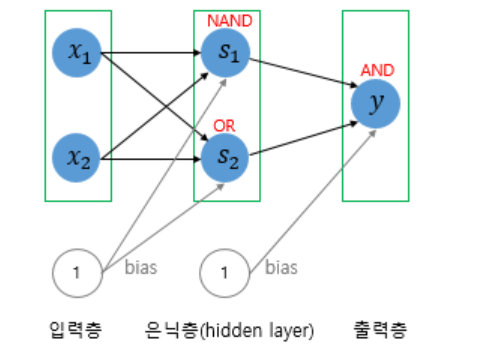

In [17]:
def XOR(x1, x2):
    s1 = NAND_gate(x1, x2)
    s2 = OR_gate(x1, x2)
    y = AND_gate(s1, s2)
    return y
inputs = [(0, 0), (1, 0), (0, 1), (1, 1)]

print('XOR :')
for x1, x2 in inputs:
    y = XOR(x1, x2)
    print('({x1}, {x2}) -> {y}'.format(x1=x1, x2=x2, y=y))



XOR :
(0, 0) -> 0
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 0
